Objective: To create a ML model to predict the weight of a person based on gender and weight using linear regression.

In [1]:
import pandas as pd
df=pd.read_csv(r'weight-height.csv')
df.head()

,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
df.shape

(10000, 3)

In [3]:
df.isnull().sum()

Gender    0
Weight    0
Height    0
dtype: int64

In [4]:
df['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

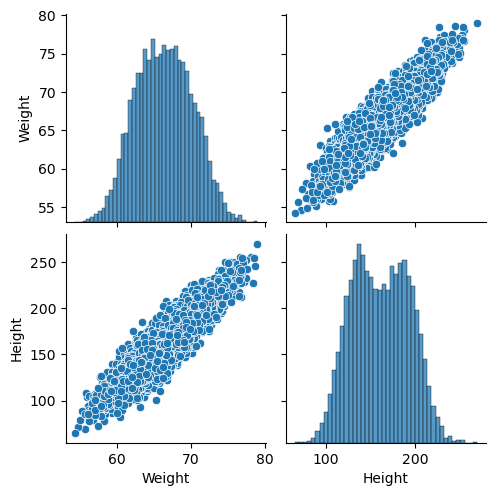

In [5]:
import seaborn as sns 
sns.pairplot(df)

Encoding

In [6]:
!pip install category_encoders

Label Encoding

In [8]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols='Gender')
df=encoder.fit_transform(df) #fit_transform is a method in scikit-learn (sklearn) used for data preprocessing and feature scaling.
df.head(5)

,Gender,Weight,Height
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


Split the dataset into input features and target column

In [10]:
x=df.drop('Weight',axis=1) #input features
y=df['Weight'] #output column
x.head()

,Gender,Height
0,1,241.893563
1,1,162.310473
2,1,212.740856
3,1,220.042470
4,1,206.349801


In [11]:
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Weight, dtype: float64

Divide into Train dataset and test dataset

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0) 

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8500, 2), (1500, 2), (8500,), (1500,))

In [15]:
x_test.head()

,Gender,Height
9394,2,138.085796
898,1,187.363366
2398,1,216.533191
5906,2,131.761443
2343,1,157.718438


In [19]:
y_test.head()

9394    64.723877
898     67.272171
2398    74.520972
5906    65.880014
2343    64.846301
Name: Weight, dtype: float64

Apply ML algo into training data

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Model Prediction

In [21]:
y_pred=model.predict(x_test)
y_pred

array([63.97514297, 69.06559842, 72.6467896 , ..., 68.44027991,
       67.47909265, 62.46913445])

In [23]:
y_test[:5]

9394    64.723877
898     67.272171
2398    74.520972
5906    65.880014
2343    64.846301
Name: Weight, dtype: float64

Model Evaluation

In [24]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
r2_score(y_test,y_pred)

0.8634063910608831

In [25]:
mean_absolute_error(y_test,y_pred)

1.1536543915007043

In [26]:
mean_squared_error(y_test,y_pred)

2.0450643845826946

In [27]:
root_mean_squared_error(y_test,y_pred)

1.4300574759717508

In [28]:
#predict my weight
my_weight=model.predict([[0,174]])
print("My predicted weight is: ", my_weight)

My predicted weight is:  [66.46560103]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
model.coef_

array([0.95937159, 0.1227704 ])

In [31]:
model.intercept_

45.10355112284053